# Atharva Oza


In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [2]:
#Load dataset
data = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
# show sample of the dataset
data.head()

,id,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,1,0,72,35,0,33.6,0.627,50.000,1,0
1,2,1,85,66,29,0.0,26.600,0.351,31,0
2,3,8,183,64,0,0.0,23.300,0.672,32,1
3,4,1,89,66,23,94.0,28.100,0.167,21,0
4,5,0,137,40,35,168.0,43.100,2.288,33,1


In [4]:
data.columns

Index(['id', 'time_pregnant_no', 'plasma_concentration',
       'diastolic_blood_pressure', 'triceps_skinfold_thickness',
       'serum_insulin', 'bmi', 'diabetes_pedigree', 'age', 'class'],
      dtype='object')

In [5]:
# split data into input and taget variable(s)

X = data.drop("class", axis=1)
y = data["class"]

In [6]:
# standardize the dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42)

In [8]:
# create the classifier

classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets

classifier.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# predictin on the test set

y_pred = classifier.predict(X_test)

In [10]:
# Calculate Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


### Accuracy is 70.12% here

# Identify important features

In [11]:
# check Important features

feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}).sort_values("importance", ascending=False)

# Display

feature_importances_df

,feature,importance
2,plasma_concentration,0.281551
6,bmi,0.151196
8,age,0.113306
7,diabetes_pedigree,0.102513
0,id,0.086632
1,time_pregnant_no,0.078094
3,diastolic_blood_pressure,0.073865
5,serum_insulin,0.059493
4,triceps_skinfold_thickness,0.053350


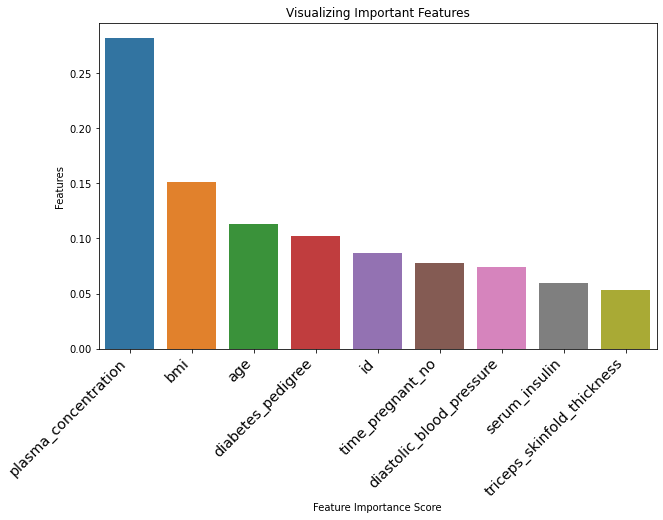

In [12]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)


# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

## Here we can see that the triceps_skinfold_thickness column has the least importance

## Now to remove that columns and train the classifier again

In [23]:
# load data with selected features
X = data.drop(["class", "triceps_skinfold_thickness", "id"], axis=1)
y = data["class"]

# standardize the dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42)

In [24]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


### Accuracy increased from 70.12% to 72.72%